# Biomockup


## Introduction
Biomockup is a programming model inspired on biomolecular evolving interactions.

The traditional programming languages allow the explicit definition of the tasks to be performed, down to the smallest detail. The behavior of the programs is deterministic, the same result will always be obtained if the same program is used with the same input data.

This behavior also has practically no tolerance for programming errors: normally, any coding error leads to an alteration of the functionality for which the program has been built, often even a complete suppression of its functionality, through degraded performance in performance or degraded in terms of the operation logic, which is manifested by the correct execution under some sets of input parameters and incorrect in other cases. We will come back to this topic later.

There is therefore a kind of implicit bijection between coding and function.
This operating paradigm has proved adequate in a broad spectrum of practical applications. Wherever it has been necessary to implement strategies where it is not desirable to code everything (automatic learning by reinforcement in any of its incarnations, for example), the starting point has always been a traditional programming language, completely bijective.

The observation of the behavior of the logical system which seems to scaffold the life, constituted by networks of interaction between proteins, nucleic acids, ligands and residues of all kinds, inspires us to try another approach based in graph theory.

Our goal is to construct a model of *graphs modifying graphs* that encapsulates some of the logic that we find in molecular biology.

## Proteins: bijection rupture.

The first observation is related to the synthesis of proteins. Their function has a lax dependence on the DNA coding sequence of their original gene, so that in many cases, proteins that only reflect a 30% identity percentage also perform the same function.

The correspondence between the function of the protein and the coding in the gene is rather *suprayective*: the same function is obtained from different initial codings.

The cell achieves this result from the three-dimensional conformation of the protein. The function is not directly expressed in the gene, which is not more than a linear structure (1D), but is achieved by restructuring in space (3D) the amino acid sequence that results from the translation, as if in some way there was a *multidimensional information implicit in the gene*.

This multidimensional information, we know that it is determined by the information 1D, but we also know that the reciprocal is not true: the information of the 3D structure can be related to many linear structures of departure.

A more detailed look to protein folding reveals two logical aspects that we want to emulate:
 
1) The folding takes place by the generation of new physical interactions: hydrogen bonds, van der waals forces, disulfure bridges,.... So creating new relations between amino acids.

2) This folding generates a *emergence of function* based in the emergence of surface structures that enable the protein to bind to another molecules. This emergence doesn't takes place into the region of internal interaction, but is a consequence of that internal interaction. So, the *logic* of folding operates in a region, and the function appears in other. This is a crucial difference with the programming paradigm of a IT  human language: the functionality of an algorithm emerges exactly where the code operates. 

*NOTE: we are aware that this comparison between life-IT and human-IT is largely naive. It has to be understood as a mere heuristic analogy, without more pretensions*.


### Interaction model.

Our central idea is to build a linear model of programming blocks (DNA) that undergo a structural transformation to a 2D network. The function will be associated with the appearance of certain motifs within this 2D model. The configuration of this 1D model to 2D will depend on certain predefined interactions between the constituent blocks of our *DNA program*, which we will parameterize in various ways, exploring the possibilities. We will call this parameterization **interaction model (MI)**.

The 2D model will be represented by a graph, which will be generated from structure 1D and MI. We will explore networks with weight between the nodes, the structures based on attractive or repulsive forces and, combined or not with these strategies, the convenience of using hypergraphs and graphs of graphs.

The objective is that the graph is generated automatically from the MI and the linear sequences. The linear sequences are also represented by graphs with nodes connected in a consecutive way.

Well, really the model doesn't speak on dimensions, but on *relations*. A relation between two constituent pieces of DNA (nodes) is represented by an edge of the graph.

The transition from the linear model (regular graph of constant degree 2) is accomplished by the generation of new interactions (creation of new edges between nodes).

An example of interaction model is:

With three types of nodes:

1. N: null generators

2. W: weak generators or short distance generators: generate relation with nodes S,W,N at a distance 3 to 6

3. S: strong generators or long distance generators : generate relation with nodes S at a distance 10 to 15

The computation of the new edges (relations) need be done in a iterative way, because the node distances are modified in every interaction. For instance, the W-generators probably will approach some nodes to the strong generators, otherwise unattainable. It's possible that several models doesn't converge in all the cases.

Note: in this model, we don't take into account, the transcriptional and traslational biological processes, nor their regulation. Our graph DNA is composed yet by amino acid. We only want to emulate the postraslational folding.

### Operation model 

Or external interaction model. Is the model that makes a protein to bin to another molecule, that enables a graph to bind to another graph. So, it's related with the function.

Once the graph has been obtained from the linear sequence and the MI, it will be necessary to explore this graph in search of structures that are associated with predefined functions. This model that associates reasons with functions is called the operation model (MO).

The search for structures in the network will be implemented by existing specialized software or by our own software if we do not find anything that fits our needs.

How is the operation model defined? The functions that are going to be associated with each motif are going to be somewhat irrelevant for this project. We could simply label them to imply that they are different from each other. However, we will try to make some association with practical meaning in order to illustrate better what we are doing.

But by analogy from life the function is attained by the capability of associate a *protein*  with another piece: protein, DNA, ..., or in our logic abstraction, where all this things are networks,  
we need to define an affinity between graphs. In other words, two graphs can bind if both contain some kind of similar subgraphs: k-cores, cliques, ... We don't now at this moment. 

# Project goals

Explore several implementations of MI and MO and analyze the resulting graphs, in an evolutionary context:

1. Identification of emerging structures.

2. Fault tolerance. Ability of the model to admit random mutations (errors) in the sequence of the initial graph, keeping the previously identified emergent structures.

3. Ease to generate new emerging structures (phase changes?).


*Note: this is actually a first piece of an evolution model where fault tolerance allows several versions of the same network to be maintained in a population of graphs, some of them very close to certain phase transitions that would enable the population to generate quickly new functions after changes in environmental restrictions. This evolutionary model could be applied, if we are lucky enough, to the implementation of reinforcement learning strategies and to understand how new functions can emerge surprisingly in highly fault tolerant systems, apparently conservative and thus not prone to functional changes.*

# Example of regular *DNA* graph

In this simple example we show the design patterns that we are going to follow.
Although we use the **networkx** package broadly, we have renounced to use all its possibilities in terms of data storage, in order to facilitate a possible future migration to another package.

That's why our basic model will consist of three pieces, the graphic object (networkx object), the list of labels associated with each node and the list of colors associated with each node. This former list is generated automatically from the labels but it is used precalculated to call many of the methods, as you will see.

A possible improvement is to build a class that encapsulates this type of objects.

In this example we generate a simple, linear network, where each node is connected to the previous one and the one that happens to it. We have three types of nodes that would be equivalent to the DNA nucleotide types.

Of this type will be the our starting networks.

['yellow', 'blue', 'red', 'blue', 'red', 'blue']


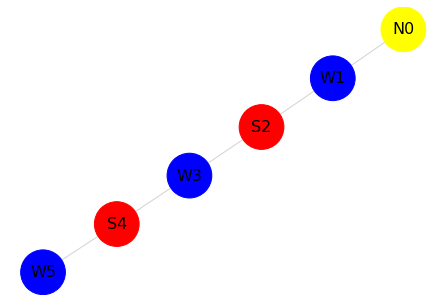

In [54]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import string
import pandas as pd
# This is a linear regular graph model, the DNA equivalent
G=nx.Graph(name="DNA")
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5)])
labels = {}
labels[0] = 'N0'
labels[1] = 'W1'
labels[2] = 'S2'
labels[3] = 'W3'
labels[4] = 'S4'
labels[5] = 'W5'

colors = []
for label in labels.values():
    if label[0] == "N":
        colors.append("yellow")
    elif label[0] == "S":
        colors.append("red")
    elif label[0] == "W":
        colors.append("blue")

pos = nx.kamada_kawai_layout(G)
print(colors)
nx.draw(G, pos, with_labels = False, node_color = colors, edge_color = "lightgray", node_size=2000)
nx.draw_networkx_labels(G,pos,labels,font_size = 16);

# Model

## Genoids

Our first entity in our model is the **genoid**, that is the equivalent of a coding gene. The genoid is composed of an arbitrary number of **nucleoids**, as nucleotides are the constituent parts of a gene. The genoid is a ordered sequence of nucleoids.

The nucleoids could have an arbitrary number of **nucleoid types**, as biological nucleotides could be adenine, guanine, ...

In our model we simplify the types to a set of cardinality three: **neutral(N)**, **weak(W)** and **strong(S)** interactors.

The genoids are represented by not periodical unidimensional graph meshes. Each node in the graph is a nucleoid.

Each nucleoid is assigned a **nucleoid code**, formed by the concatenation of the nucleoid_type and his sequence number within the genoid.

Also a genoid can be represented as a **genoid sequence**, the string formed by the ordered concatenation of nucleoid types.

A **subgenoid** of a given genoid is a genoid formed by a subset of the genoid nucleoids, not necessarily consecutive.

A genoid could be created from genoid sequence by means of method *genoid_from_sequence*.

But, really a genoid is an object (but not formally implemented as a class instance) composed by data types: the graph, the array of labels ```genoid_codes```, and the array of colors (see [3]).

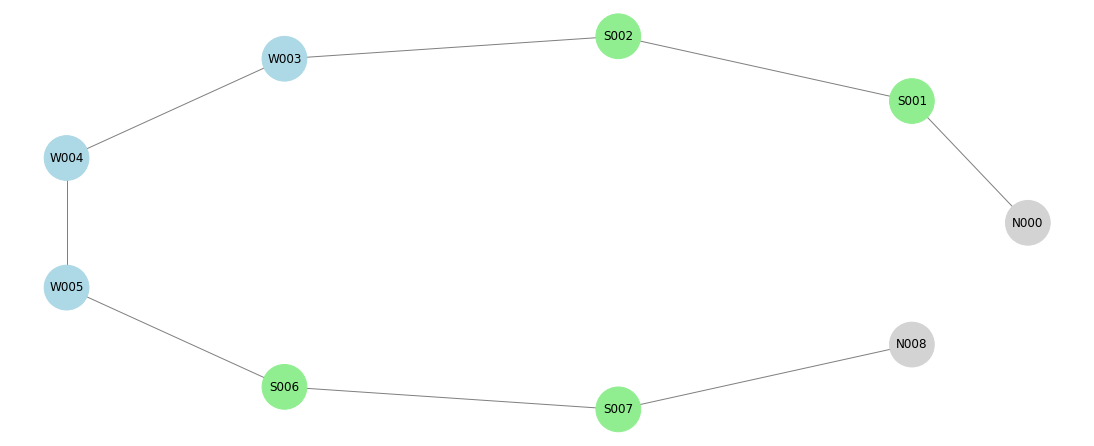

In [55]:
# Constants related to ploting
NODE_SIZE_1 = 2000 # Node size for nx.graph
FONT_SIZE_1 = 12 # Font size for nx.graph
FIGSIZE_1 = (15, 6) # Figure size for ploting
EDGE_COLOR = "gray" # Edge color
NUCLEOID_MASK = "{:03d}"

# Methods
def get_graph_metrics(graph):
    """
    Generate main metrics of a networkx graph
        
    Parameters:
        graph: graph networkx object
    Returns:
        float: The clustering index (C)
        float: Average shortest path length (L)
        float: Order of the largest connected component (O)
        
    """
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()

def asign_color(nucleoid_type):
    """
    Asign color by nucleoid type
    """
    if nucleoid_type == "N":
        color = "lightgray"
    elif nucleoid_type == "S":
        color = "lightgreen"
    elif nucleoid_type == "W":
        color = "lightblue"
    else:
        color = "white"
    return color
        
def genoid_from_sequence(genoid_sequence):
    """ 
    Create nonperiodic unidimensional grid according to genoid string
    Genoid string is a sequence of N, W and S
    """
    genoid = nx.Graph(name="DNA")
    i = 0
    nucleoid_codes = {}
    nucleoid_colors = []
    for nucleoid_type in genoid_sequence:
        if i >= 1:
            genoid.add_edges_from([(i-1, i)])
        nucleoid_codes[i] = nucleoid_type + NUCLEOID_MASK.format(i)
        nucleoid_colors.append(asign_color(nucleoid_type))
        i += 1
    return genoid, nucleoid_codes, nucleoid_colors

def plot_genoid(genoid, nucleoid_codes, nucleoid_colors):
    """
    Plot genoid
    """
    plt.figure(figsize=FIGSIZE_1)
    pos = nx.circular_layout(genoid)
    nx.draw(genoid, pos=nx.circular_layout(genoid), with_labels=False, 
            node_color=nucleoid_colors, edge_color=EDGE_COLOR, node_size=NODE_SIZE_1)
    nx.draw_networkx_labels(genoid, pos, nucleoid_codes, font_size=FONT_SIZE_1);

def plot_subgenoid(genoid, subgenoid, genoid_codes, genoid_colors):
    """
    Plot subgenoid
    """
    subgenoid_nodes = subgenoid.nodes()
    subgenoid_codes = {i:genoid_codes[i] for i in subgenoid_nodes}
    subgenoid_colors = [genoid_colors[i] for i in subgenoid_nodes]
    plot_genoid(subgenoid, subgenoid_codes, subgenoid_colors)
    
genoid, genoid_codes, genoid_colors = genoid_from_sequence("NSSWWWSSN")
plot_genoid(genoid, genoid_codes, genoid_colors)

Each node is asigned a label format by the genoid type and an integer that matches with the node index and accordingly to the ```NUCLEOID_MASK```. By default we create networks from 0 to 1000 nodes, that is enough for our goals.

## Proteoids

El proteoid es el equivalente proteoico de nuestro modelo. Podemos decir que el genoid es al gen como el proteoide es a la proteina.

Pero nuestro modelo simplifica, o mejor dicho, ignora una parte de los pasos biológicos capaces de construir una proteína a partir del gen, a saber:

1. Spliting alternativo
2. Transcripcion
3. Traducción sobre la conversión de tres nucleótidos en un aminoácido.
4. Modificaciones post-traduccionales.

De hecho el nucleoid sigue siendo el nodo constituyente del proteoid, tal y como lo era en el genoid. ¿En qué se diferencia entonces el proteoid del genoid del que procede?. Simplemente en las nuevas relaciones que se establecen entre los nodos. En un proteoid existen relaciones entre nodos no consecutivos, y esto sí emula en cierta media lo que ocurre en la naturaleza, donde las fuerzas físico químicas pliegan la cadena aminoacídica lineal estableciendo enlaces entre nodos no adjacentes: fuerzas de vander Vaals, puentes de hidrógeno, enlaces disulfuro, ...

El método ```generate_proteoid``` alberga la magia para hacer este pseudo-plegamiento posible a partir de una genoid_sequence y de acuerdo a una regla.

Una regla (de plegamiento o de relación) es un string que de forma compacta contiene la información para generar los edges adicionales en un genoid, esto es, para generar las relaciones entre nodos que no sean consecutivos.

Las reglas constan de varias subreglas separadas por pipes. Cada una de ellas consta de cuatro partes separadas por undesrcores:

1. Tipo de nodo origen (N, W o S)
2. Tipos de nodo destino (N, NW, NWS, ...)
3. Un entero que indica la mínima distancia ```nx.shortest_path_length``` a la que debe estar un nodo destino del nodo origen para poder ser enlazado.
4. Un entero que indica la máxima distancia ```nx.shortest_path_length``` a la que debe estar un nodo destino del nodo origen para poder ser enlazado.

Por ejemplo, esta regla ```W_WN_3_5|S_S_10_30``` indica al generador que debe construir edges:

1. Entre cualquier nodo origen W y todos los nodos W y N que estén a una distancia mayor o igual a 3 y menor o igual que 5.

2. Entre cualquier nodo origen S y todos los nodos S que estén a una distancia mayor o igual a 10 y menor o igual que 30.

También podemos construir un proteoid a partir de un genoid ya creado, mediante el método ```proteoid_from_genoid```.

Combinando esto con el método ```random_genoid_sequence```podemos generar genoids y proteoids aleatoriamente. A este método se le pasa un string de probabilidad que indica también de forma mjy compacta y visual, las probabilidades de que un nodo aparezca en la secuencia. Así "NWS" hace que todos los tipos de nodos sean equiprobables y  "NWWSSS" provoca que los nodos W tengan el doble de probabilidad que los N y lo S el triple que los W.


## Mutaciones

Nuestras redes básicas genoids y proteoids puden ser modificadas mediante eventos de mutación. Por analogía con la biología molecular, estas mutaciones consisten en uno o más cambios del tipo de nucleoid dentro de un genoid. No contemplamos mutaciones que cambien nucleoids en proteoids.

El método ```mutate_genoid_sequence``` nos permite generar cambios de tipo de nucleoid en un genoid. Podemos indicarle el número de mutaciones que deseamos y un cadena que representa de forma compacta la probabilidad de cambio, de forma muy parecida a como lo hemos hecho en la generación random.  Así "NWS" hace que todos las mutaciones desde un nucleoid dado sean equiprobables y  "NWWSSS" provoca que un nodo tengan el doble de probabilidad de mutar hacia W que hacia N y el triple de probabilidad de mutar a S que hacia N.

### Fitness consequences.

Ahora pongamos que hemos mutado un genoid y computado el correspondiente proteoid. El resultado de una mutación sobre un genoid de 30 nucleoids lo vemos en el siguiente celda de output. Vemos como los edges se han "desplazado" desde la zona izquierda del proteoid a la zona derecha, groso modo. Aquí hemos aplicado 10 mutaciones con el probability string básico ("NWS") a un genoid obtenido de forma random "SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN".

Y llega el momento clave de diseñar una de los engranajes que pretende explorar nuestro modelo, qué tipo de mutaciones generan algo distinto (un proteoid capaz de hacer otras cosas), es decir qué mutaciones tendrían fitness consequences.

Para ello tenemos que definir qué consideramos por función o quizá, de forma más fácil, qué características de nuestros proteoids asociamos a una determinada función. De otra forma, en qué nos podemos basar para decir que un proteoid realizaría la misma función que otro proteoid estructuralmente diferente, o de forma más compacta, qué entendemos por igualdad funcional de proteoids.

El problema estriba entonces en definir la igualdad de proteoids. Se nos ocurren muchas formas, pero aquí hemos explorado sólo una, la que atribuye igualdad al hecho de que una o más graph métricas sean coincidentes dentro de determinados márgenes de tolerancia.

Las tolerancias las expresamos en pocentajes que afectan a las métricas indicadas

Una tolerancia típica estaría representada por el siguiente diccionario: ```{'W':10, 'N':20, 'S':10, 'avg_degree':20, 'min_degree':10```, que significa que dos proteoids son equivalentes (funcionalmente) si el número de nodos W difiere en menos de un 10%, el número de nucleoids N en menos de un 20%, el número de nucleoids S en menos de un 10%, al average degree en menos de un 10% y el minimum degree en menos de un 10%.

Las función ```compare_proteoid_structs``` es la función principal encargada de realizar las comparaciones y se apoya en varias funciones instrumentales.

En los ejemplos que siguen reproducimos una mutación con fitness consequences de acuerdo a esta definición de tolerancias y una mutación sin ellas. Vemos que visualmente la segunda de las mutaciones nos da una sensación de mayor parecido. Por tanto damos por bueno el modelo en primera instancia.

In [99]:
# Constants
NODES = "SWN"
def proteoid_from_genoid(genoid, genoid_codes, rule):
    """ 
    Create relations(edges) into a genoid according to rules, so transforming in a proteoid
    """
    edges_added = {}
    rules = rule.split("|")
    proteoid = genoid.copy()
    for i in range(genoid.order()):
        for generator in rules:
            [nucleoid_type, nucleoid_fin, distance_ini, distance_fin] = generator.split("_")
            distance_ini = int(distance_ini)
            distance_fin = int(distance_fin)
            if genoid_codes[i][0] == nucleoid_type:
                for j in range(i+1, genoid.order()):
                    distance = nx.shortest_path_length(genoid, source=i, target=j)
                    if distance <=distance_fin and distance >= distance_ini and genoid_codes[j][0] in nucleoid_fin:
                        proteoid.add_edges_from([(i, j)])
                        if nucleoid_type in edges_added:
                            edges_added[nucleoid_type] += 1
                        else:
                            edges_added[nucleoid_type] = 1
    return proteoid, genoid_codes

def generate_proteoid(genoid_sequence, rule, plot=False):
    """
    Generate proteoid from genoid_sequence according to rule
    """
    genoid, genoid_codes, proteoid_colors = genoid_from_sequence(genoid_sequence)
    proteoid, proteoid_codes = proteoid_from_genoid(genoid, genoid_codes, rule=rule)
    if plot:
        plot_genoid(proteoid, proteoid_codes, proteoid_colors)
    proteoid_core = nx.k_core(proteoid, k=None, core_number=None)
    proteoid_core_number = nx.core_number(proteoid)
    m = max(proteoid_core_number, key=proteoid_core_number.get)
    proteoid_core_degree = proteoid_core_number[m]
    c, l, o = get_graph_metrics(proteoid_core)
    return c, l, o, proteoid_core, proteoid_core_degree, proteoid, proteoid_codes, proteoid_colors

def random_genoid_sequence(probability_string="NWS", length=20):
    """Generate a random genoid sequence of fixed length and composition"""
    return ''.join(random.choice(probability_string) for i in range(length))

def mutate_genoid_sequence(genoid_sequence, mutations=1, probability_string="NWS"):
    """Generate n mutations in genoid_sequence"""
    genoid_sequence_mutated = list(genoid_sequence)
    for mutation in range(mutations):
        mutation_pos = random.randint(0, len(genoid_sequence) - 1)
        #print("M", mutation_pos, genoid_sequence_mutated)
        probability_string_filtered = ''.join(c for c in probability_string if c != genoid_sequence_mutated[mutation_pos])
        mutation_char = random.choice(probability_string_filtered)
        #print(mutation_pos, probability_string_filtered, genoid_sequence_mutated[mutation_pos] , "->", mutation_char)
        genoid_sequence_mutated[mutation_pos] = mutation_char
    return ''.join(genoid_sequence_mutated)

def has_tolerance(metric, struct1, struct2, tolerance, verbose=True):
    """
    Retuns if a metric from functional struct1 and functional struct2 are similar 
    between a certain tolerance interval
    """
    if verbose: print("##### Has tolerance")
    has_tolerance = True
    if metric in struct1 and metric in struct2:
        m = max(struct1[metric], struct2[metric])
        tolerance = round(int(tolerance)*m/100.0)
        if verbose: print("has_tolerance", struct1[metric], struct2[metric], "Dif:", abs(struct1[metric] - struct2[metric]), "Tolerance", tolerance)
        if abs(struct1[metric] - struct2[metric]) > tolerance:
            has_tolerance = False
            if verbose: print("Tolerance not verified on " + metric + " tolerance " + str(tolerance), struct1[metric], struct2[metric])
        else:
            if verbose: print("Tolerance verified on " + metric + " tolerance " + str(tolerance))
    elif metric not in struct1 and metric not in struct2:
        has_tolerance = True
        if verbose: print("Tolerance verified on " + metric)
    else:
        has_tolerance = False
        if verbose: print("Tolerance not verified on " + metric)
    return has_tolerance

def get_proteoid_functional_struct(proteoid, proteoid_codes):
    """
    Obtain the functional structure of a proteoid
    """
    proteoid_structure = {}
    nucleoid_types = [proteoid_codes[i][0] for i in proteoid_codes.keys() if i in proteoid.nodes()]
    #print("----------nucleoid_types", nucleoid_types)
    for nucleoid_type in NODES:
        proteoid_structure[nucleoid_type] = 0
    for nucleoid_type in nucleoid_types:
        proteoid_structure[nucleoid_type] += 1
    proteoid_structure["avg_degree"] = sum(degree for _, degree in proteoid.degree())/proteoid.order()
    proteoid_structure["min_degree"] = min(degree for _, degree in proteoid.degree())
    return proteoid_structure

def compare_proteoid_structs(tolerances, proteoid1, proteoid2, proteoid_codes1, proteoid_codes2, verbose=True):
    """ 
    Similarity of genoids by comparing functional structures according to tolerances
    Based on number of nodes W, N, S, the minimun degree and the overall degree with tolerances
    """
    struct1 = get_proteoid_functional_struct(proteoid1, proteoid_codes1)
    struct2 = get_proteoid_functional_struct(proteoid2, proteoid_codes2)
    if verbose:
        print("")
        print("struct1", struct1)
        print("struct2", struct2)
    for metric in tolerances.keys():
        metric_tolerance = tolerances[metric]
        verify_metric = has_tolerance(metric, struct1, struct2, metric_tolerance, verbose)
        if not verify_metric: return False
    return True

### Mutation with fitness consequences

SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN 30
SNSNWSSNNWWSNNSNNSNNNNSNNNNNNN 30
{'S': 6, 'W': 6, 'N': 3, 'avg_degree': 3.6, 'min_degree': 3}
{'S': 8, 'W': 3, 'N': 4, 'avg_degree': 3.7333333333333334, 'min_degree': 3}
Mutation with fitness consequences? True


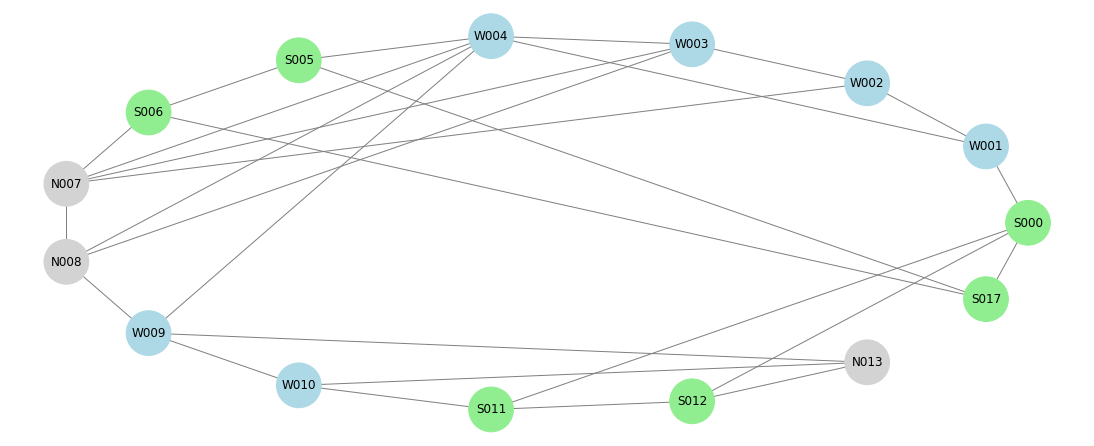

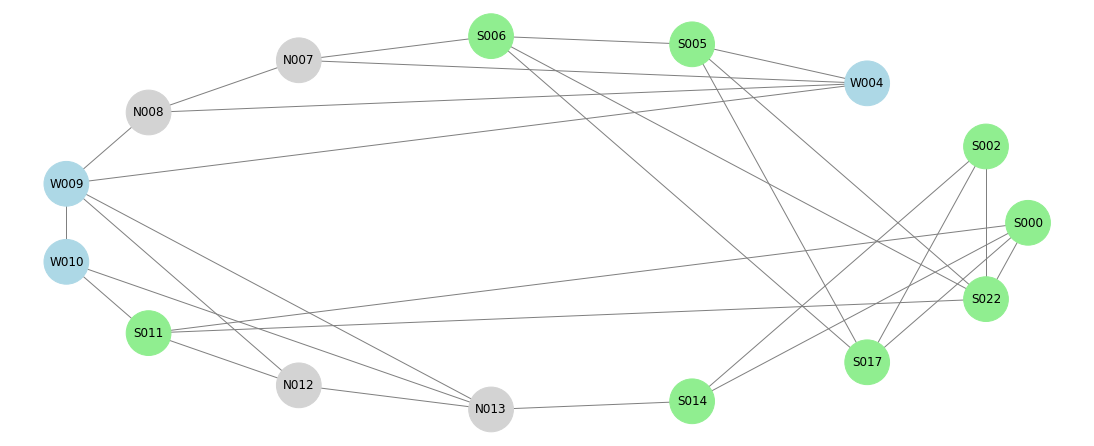

In [76]:
random.seed(20)
genoid_sequence = random_genoid_sequence("NNNNNNNNNNWWWSS", 30) 
print(genoid_sequence, len(genoid_sequence))
rule = "W_WN_3_5|S_S_10_30"
c, l, o, proteoid_core, proteoid_core_degree, proteoid, proteoid_codes, proteoid_colors =\
    generate_proteoid(genoid_sequence, rule, plot=False)
plot_subgenoid(proteoid, proteoid_core, proteoid_codes, proteoid_colors)

genoid_sequence_mutated = mutate_genoid_sequence(genoid_sequence, mutations=10, probability_string="NWS")
print(genoid_sequence_mutated, len(genoid_sequence_mutated))
c, l, o, proteoid_core_mutated, proteoid_core_mutated_degree, proteoid_mutated, proteoid_codes_mutated, proteoid_colors_mutated =\
    generate_proteoid(genoid_sequence_mutated, rule, plot=False)
plot_subgenoid(proteoid_mutated, proteoid_core_mutated, proteoid_codes_mutated, proteoid_colors_mutated)

struct_proteoid = get_proteoid_functional_struct(proteoid_core, proteoid_codes)
struct_proteoid_mutated = get_proteoid_functional_struct(proteoid_core_mutated, proteoid_codes_mutated)
print(struct_proteoid)
print(struct_proteoid_mutated)
tolerances = {'W':10, 'N':20, 'S':10, 'avg_degree':20, 'min_degree':10}
similarity = compare_proteoid_structs(tolerances, proteoid_core, proteoid_core_mutated, proteoid_codes, proteoid_codes_mutated, verbose=False)
print("Mutation with fitness consequences?", not similarity)

### Mutation without fitness consequences

SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN 30
SWWWWSNNNWWSSNSNNSNNNNNNNNNNNN 30
{'S': 6, 'W': 6, 'N': 3, 'avg_degree': 3.6, 'min_degree': 3}
{'S': 3, 'W': 6, 'N': 4, 'avg_degree': 3.8461538461538463, 'min_degree': 3}
Mutation with fitness consequences: True


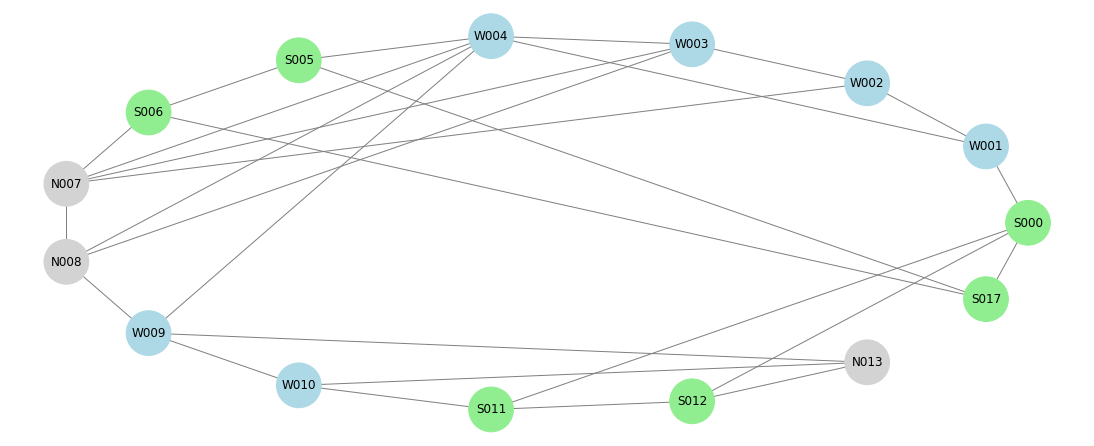

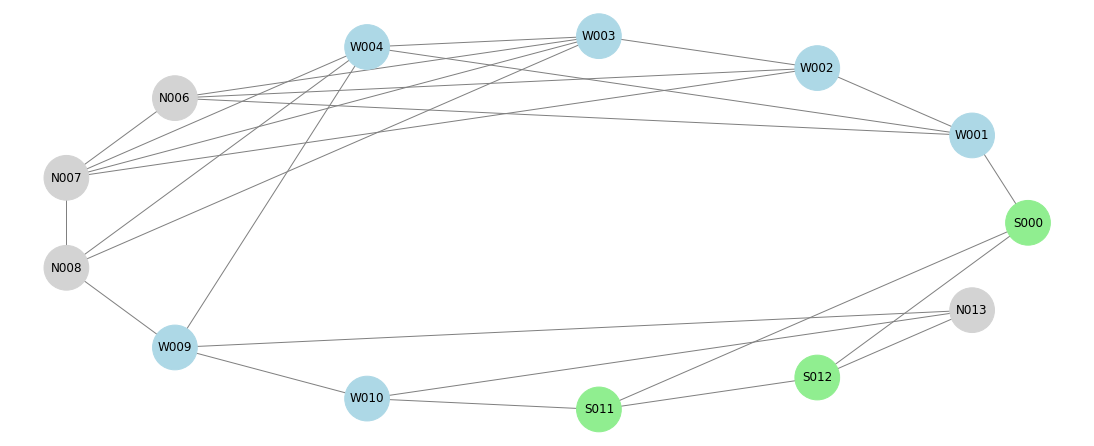

In [67]:
random.seed(20)
genoid_sequence = random_genoid_sequence("NNNNNNNNNNWWWSS", 30) 
print(genoid_sequence, len(genoid_sequence))
rule = "W_WN_3_5|S_S_10_30"
c, l, o, proteoid_core, proteoid_core_degree, proteoid, proteoid_codes, proteoid_colors =\
    generate_proteoid(genoid_sequence, rule, plot=False)
plot_subgenoid(proteoid, proteoid_core, proteoid_codes, proteoid_colors)

genoid_sequence_mutated = mutate_genoid_sequence(genoid_sequence, mutations=1, probability_string="NWS")
print(genoid_sequence_mutated, len(genoid_sequence_mutated))
c, l, o, proteoid_core_mutated, proteoid_core_mutated_degree, proteoid_mutated, proteoid_codes_mutated, proteoid_colors_mutated =\
    generate_proteoid(genoid_sequence_mutated, rule, plot=False)
plot_subgenoid(proteoid_mutated, proteoid_core_mutated, proteoid_codes_mutated, proteoid_colors_mutated)

struct_proteoid = get_proteoid_functional_struct(proteoid_core, proteoid_codes)
struct_proteoid_mutated = get_proteoid_functional_struct(proteoid_core_mutated, proteoid_codes_mutated)
print(struct_proteoid)
print(struct_proteoid_mutated)
tolerances = {'W':10, 'N':20, 'S':10, 'avg_degree':20, 'min_degree':10}
similarity = compare_proteoid_structs(tolerances, proteoid_core, proteoid_core_mutated, proteoid_codes, proteoid_codes_mutated, verbose=False)
print("Mutation with fitness consequences:", not similarity)

## Cores principales

Seguramente os habéis fijado que en los dibujos anteriores no aparecen todos los nodos (30). Cuál es el criterio para sólo pintar los que se muestran?.

Sólo pintamos el core del proteoid, de acuerdo al método 'nx.k_core' llamado sin parámetros es decir, sólo pintamos el k-core principal del proteoid, que es la más densa en relaciones. Consideramos, *por definición*, esta parte del proteoid com la parte funcionalmente relevante. Y las reglas de comparación se aplican siempre a los cores principales de los proteoids que están siendo comparados.

## Mutation cycles

Y llegamos al punto en que deseamos estudiar como afectan ciclos de mutaciones continuadas a una estructura genoid-proteoid, con qué facilidad puede romperse el fitness, o de otra forma, con qué facilidad el sistema admite varias versiones del proteoid funcionalmente equivalentes.

Si nuestro modelo puede servir para desarrollos futuros de investigación evolutiva, esperamos que para ciertas parametrizaciones puedan sucederse estructuras equivalentes a pesar de las mutaciones. Parece evidente que será relativamente fácil conseguir estructuras no equivalentes.

Esto es lo que hace la función ```mutation_cicle```, que lanza la simulación de una serie de mutaciones configurable, de acuerdo a unas tolerancias configurables 

In [103]:
def plot_graph2(graph, labels, colors, axis, title, title_color):
    """
    Plot graph
    """
    plt.sca(axis)
    axis.set_axis_off()
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos=nx.circular_layout(graph), ax=axis, with_labels = False, node_color=colors, edge_color="gray", node_size=2000)
    nx.draw_networkx_labels(graph, pos, labels, ax=axis, font_size=10)
    plt.title(title, color=title_color, fontsize=9)

def plot_subgraph2(graph, subgraph, graph_labels, graph_colors, axis, title, title_color):
    """
    Plot subgraph
    """
    subgraph_nodes = subgraph.nodes()
    subgraph_labels = {i:graph_labels[i] for i in subgraph_nodes}
    subgraph_colors = [graph_colors[i] for i in subgraph_nodes]
    plot_graph2(subgraph, subgraph_labels, subgraph_colors, axis, title, title_color)

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val else 'black'
    return 'color: %s' % color

def mutation_cicle(graph, c, l, k_core, node_string, labels, colors, tolerances, mutation_step, mutations_count, probability_string="NWS"):
    """
    """
    assert mutations_count >= 1, "Parameter mutations_count must be greater than 0"
    df = pd.DataFrame(columns=['genoid', 'fitcons','N', 'W', 'S', 'min_degree', 'avg_degree', 'order', 'size', 'C', 'L'])
    plot_row = 4
    mutations = {}
    # Add original genoid allele
    mutations_count += 1
    node_string_mutated = node_string
    genoid_orig = get_proteoid_functional_struct(k_core, labels)
    genoid_orig['genoid'] = node_string
    genoid_orig['fitcons'] = False
    genoid_orig['order'] = k_core.order()
    genoid_orig['size'] = k_core.size()
    genoid_orig['C'] = c
    genoid_orig['L'] = l
    df = df.append(genoid_orig, ignore_index=True)
    row_grid = int(mutations_count/plot_row) + 1
    if mutations_count%plot_row == 0: row_grid -= 1
    #print(row_grid)
    plt.axis('off')
    fig, axs = plt.subplots(row_grid, plot_row, figsize=(22, 8*row_grid))
    if row_grid == 1:
        axis = axs[0]
    else:
        axis = axs[0, 0]
    plot_subgraph2(graph, k_core, labels, colors, axis, node_string, "black")
    #print(axs)
    k_core_mutated = k_core.copy()
    labels_mutated = labels
    for mutation in range(1, mutations_count):
        node_string_mutated = mutate_genoid_sequence(node_string_mutated, mutations=mutation_step, probability_string=probability_string)
        # Previous k_core and labels
        k_core = k_core_mutated.copy()
        labels = labels_mutated
        c, l, o, k_core_mutated, k_core_mutated_degree, graph_mutated, labels_mutated, colors = generate_proteoid(node_string_mutated, rule, plot=False)
        if row_grid == 1:
            axis = axs[mutation]
        else:
            axis = axs[int(mutation/plot_row), int(mutation%plot_row)]
        s_mutated = get_proteoid_functional_struct(k_core_mutated, labels_mutated)
        consequences = not compare_proteoid_structs(tolerances, k_core, k_core_mutated, labels, labels_mutated, verbose=False)
        if consequences: color = "darkgreen"
        else: color = "black"
        plot_subgraph2(graph_mutated, k_core_mutated, labels_mutated, colors, axis, node_string_mutated, color)
        #print(node_string_mutated, "Function", s_mutated, "Consequences", consequences)
        s_mutated['genoid'] = node_string_mutated
        s_mutated['fitcons'] = consequences
        s_mutated['order'] = k_core_mutated.order()
        s_mutated['size'] = k_core_mutated.size()
        s_mutated['C'] = c
        s_mutated['L'] = l
        df = df.append(s_mutated, ignore_index=True)
    for i in range(int(mutations_count%plot_row), plot_row):
        if row_grid == 1:
            axis = axs[i]
        else:
            axis = axs[row_grid - 1, i]
        axis.set_axis_off()
    print(df)
#     display(df.style.applymap(color_negative_red, subset=['fitcons']).
#             format("{:.2f}", subset=['avg_degree', 'C', 'L']).
#             hide_index().
#             set_properties(**{'text-align': 'left', 'font-family' : 'courier'}))
    plt.show()

### Mutation cycle with low mutation rate

                                      genoid fitcons  N  W  S min_degree  \
0   SWWWWSSNNWWSSNSNNSNNNNNNNNNNNNNNNWSWNNNN   False  6  8  8          3   
1   SWWWWSSNNWWSSNSNNSNNNNNNNNNNNNNNNSSWNNNN    True  0  0  5          4   
2   SWWWWSSNNWWSSNSNNSNNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
3   SWWWWSSNNWWSSWSNNSNNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
4   SWNWWSSNNWWSSWSNNSNNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
5   SWNWWSNNNWWSSWSNNSNNNNNNNWNNNNNNNSSWNNNN    True  5  6  8          3   
6   SWNWWSNNNWWSWWSNNSNNNNNNNWNNNNNNNSSWNNNN   False  5  7  7          3   
7   SWNWWSNNNWWSWWSNNSSNNNNNNWNNNNNNNSSWNNNN    True  0  0  5          4   
8   SWNWWSNNNWWSWWSNWSSNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
9   SWNWWSNNNWWSWWSNWSSNNNNNNWNNNNNNNSSWNNNW   False  0  0  5          4   
10  SSNWWSNNNWWSWWSNWSSNNNNNNWNNNNNNNSSWNNNW    True  0  0  9          4   
11  SSNWWSNNNWWSWWNNWSSNNNNNNWNNNNNNNSSWNNNW    True  2  5  8          4   
12  SSNWWSNN

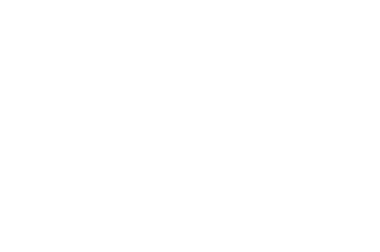

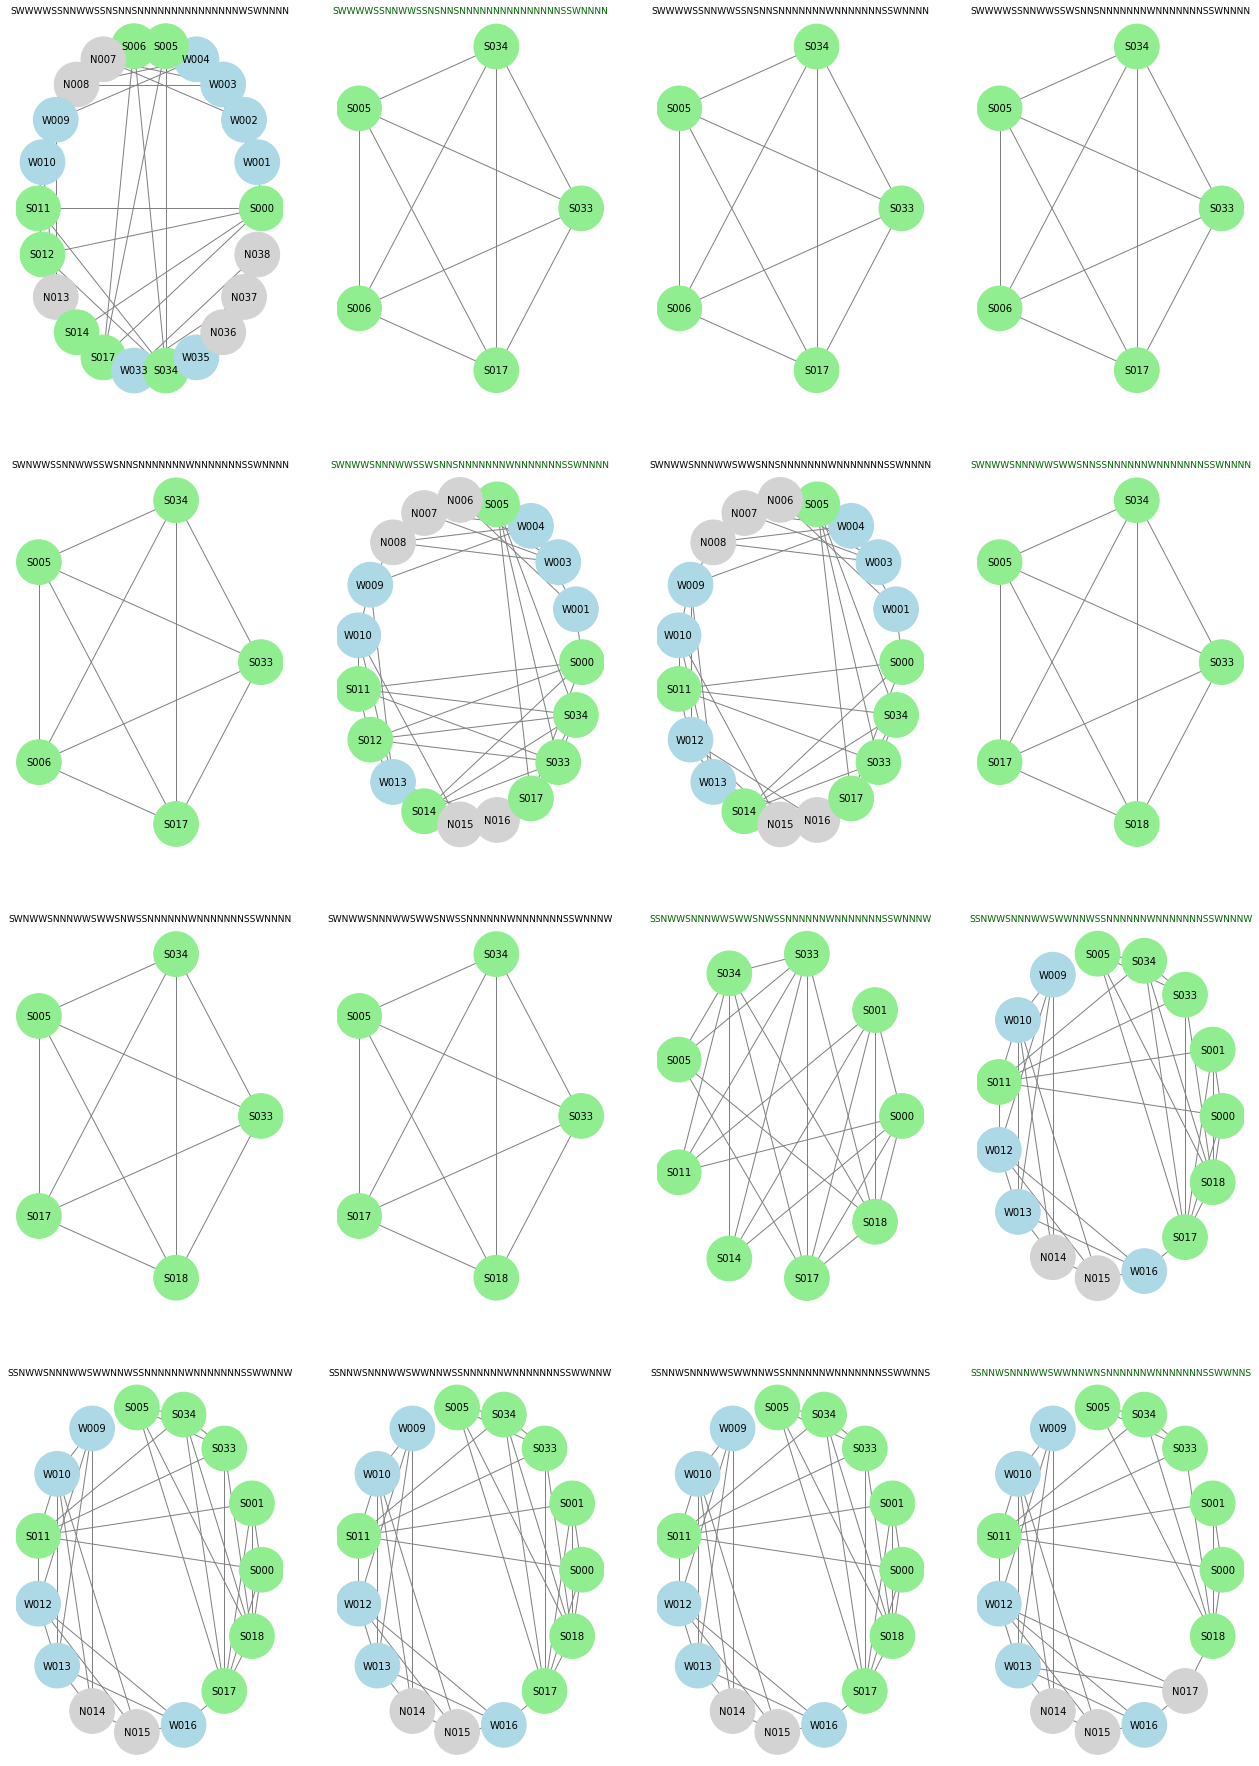

In [104]:
random.seed(20)
node_string = random_genoid_sequence("NNNNNNNNNNWWWSS", 40) 
rule = "W_WN_3_5|S_S_10_30"
c, l, o, k_core, k_core_degree, graph, labels, colors = generate_proteoid(node_string, rule, plot=False)
tolerances = {'W':20, 'N':50, 'S':10, 'avg_degree':10, 'min_degree':10}
probability_string = "NWS"
mutation_cicle(graph, c, l, k_core, node_string, labels, colors, tolerances,
               mutation_step=1, mutations_count=15, probability_string=probability_string)

### Mutation cycle with high mutation rate

                                      genoid fitcons  N   W   S min_degree  \
0   NNNWSNNWWNNNWSSWWNNWWWWNSSWNNSNNNNNNNNNN   False  4  11   6          3   
1   NSNWSNNWWNWNWSNWWNNWWWWNSSWNNSNNNNNNWNNN    True  5  12   6          3   
2   NSNNSNNWWNWNWSNWWWNWWSWNSSWNNSNNNNNNWNNS    True  1   7   8          4   
3   NSNNSNNWWSNNWSNWWWNWWSWNSNWNNSNNNNNSWNNS   False  1   7   8          4   
4   NSNNSNNNSSNNWSNWWWNWWSNNSNWNNSNNNWNSWNNS   False  2   6   9          4   
5   SSNNSNNSSSNWWSNWWWNWWSNNSNWWNSNNNWNSWNNS    True  0   0  11          5   
6   SSNNSNNSSSWWWSNWWWNWWSNNSSWWNWNNNNNSWNNS   False  0   0  11          5   
7   NSNNSSNSSSWWWSNWNWNWWSNNSSWWNWNNNNNSNNNS    True  4   7  12          4   
8   NNNNSSNSSSNWWSWWNWNNWSNNSSWWNWNNNNNSNNNS   False  3   6  11          4   
9   NNNNSSSSSSNWWSWWNWNWWSNNSSSWNWNNNWNSNNNS    True  0   0  10          6   
10  NNNNSSNSSSNWWSNNNWNNWSNNSSSWNWNNNWNSNNNS    True  0   0  12          5   

    avg_degree order size         C         L  
0     4.476190 

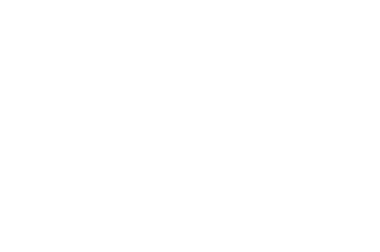

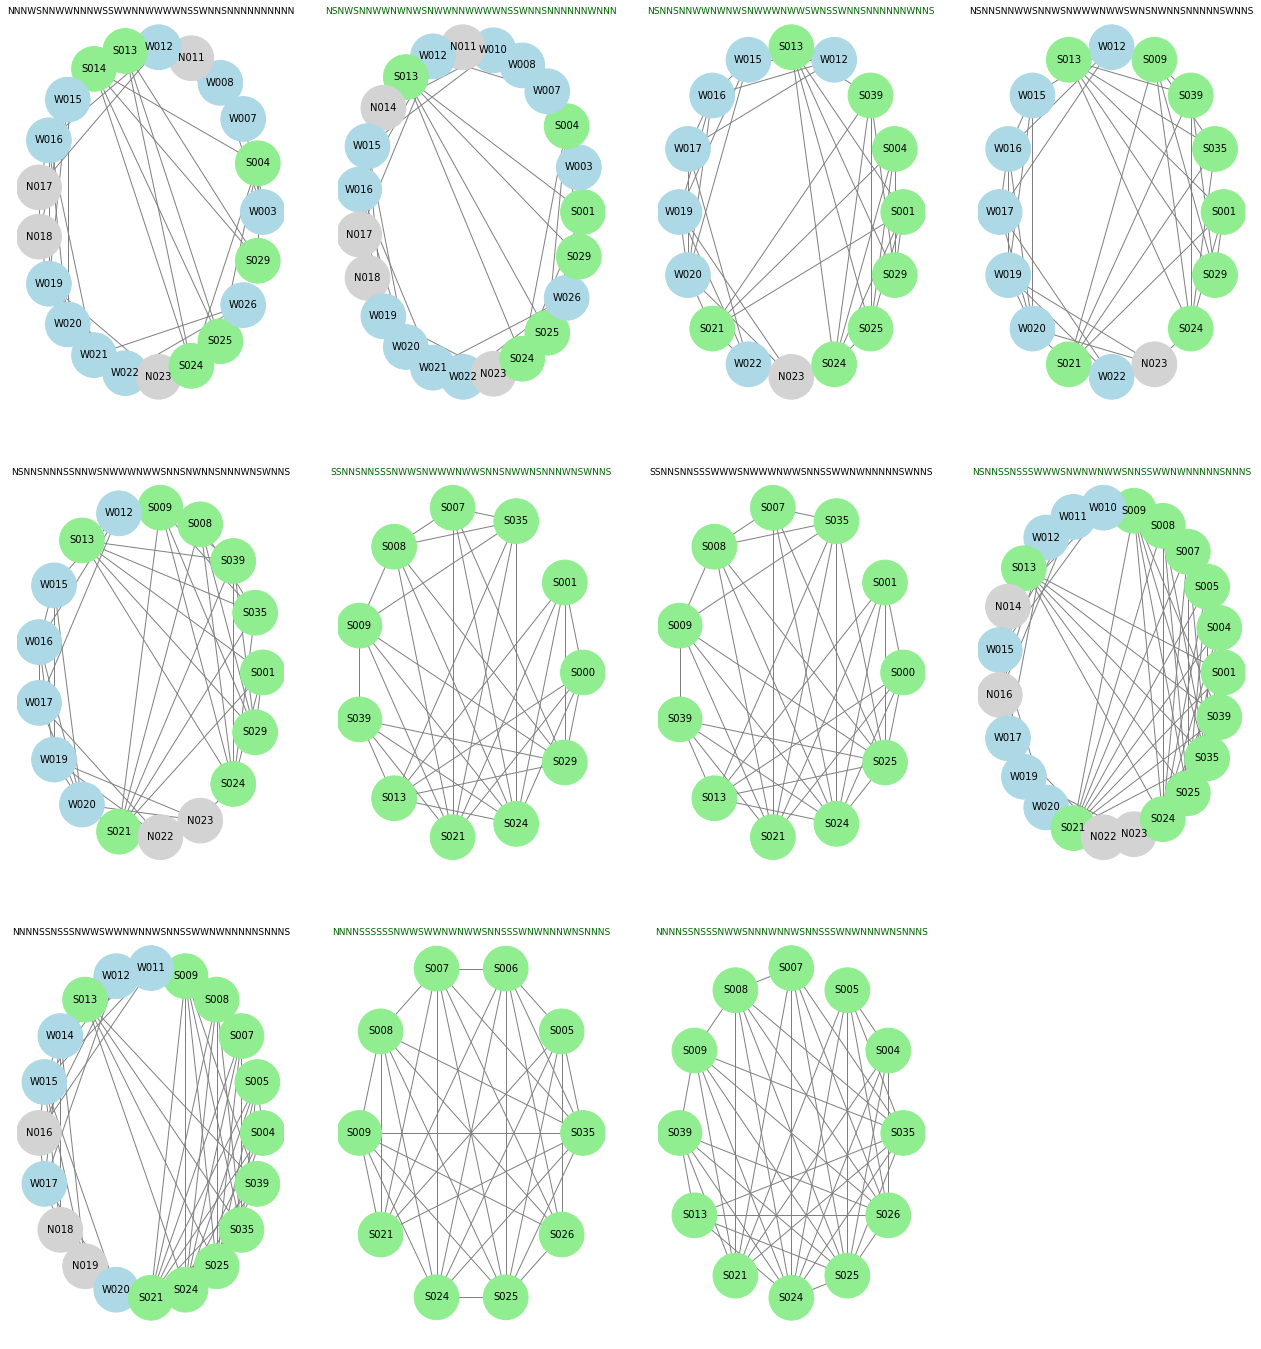

In [106]:
random.seed(20)
node_string = random_genoid_sequence("NNNNNNNNNNWWWWWSSSS", 40) 
rule = "W_WN_3_5|S_S_10_30"
c, l, o, k_core, k_core_degree, graph, labels, colors = generate_proteoid(node_string, rule, plot=False)
tolerances = {'W':20, 'N':50, 'S':10, 'avg_degree':10, 'min_degree':10}
probability_string = "NWS"
mutation_cicle(graph, c, l, k_core, node_string, labels, colors, tolerances,
               mutation_step=4, mutations_count=10, probability_string=probability_string)

# Outputs

In [41]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx Biomockup.ipynb 1>/dev/null 2>/dev/null
/Library/TeX/texbin/pdflatex -shell-escape Biomockup 1>/dev/null 2>/dev/null
jupyter nbconvert --to html_embed --template toc2 Biomockup.ipynb 1>/dev/null 2>/dev/null